In [1]:
# classify phase 0, 1, 2, 3, 4 at cardiac action potentials

In [6]:
import sys
import subprocess

# Install the wfdb package using pip
subprocess.check_call([sys.executable, "-m", "pip", "install", "wfdb"])

  Using cached wfdb-4.1.2-py3-none-any.whl.metadata (4.3 kB)
  Using cached soundfile-0.12.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (14 kB)
Using cached wfdb-4.1.2-py3-none-any.whl (159 kB)
Using cached soundfile-0.12.1-py2.py3-none-macosx_11_0_arm64.whl (1.1 MB)



[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


0

In [10]:
import sys
import subprocess

# Install the pyABF package using pip
subprocess.check_call([sys.executable, "-m", "pip", "install", "pyabf"])



[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


0

In [ ]:
######################### BUILD THE DATASET ############################

In [107]:
# Function to plot phases based on given start and end times
def plot_phases(sweepX, sweepY, phase_times):
    plt.figure(figsize=(15, 6))
    
    # Define colors for each phase
    colors = {
        0: "red",
        1: "orange",
        2: "yellow",
        3: "green",
        4: "blue"
    }
    
    # Plot the original signal
    plt.plot(sweepX, sweepY, label="Original Signal", color='black')
    
    # Plot each phase with a distinct color
    for phase, (start_time, end_time) in enumerate(phase_times):
        phase_indices = np.where((sweepX >= start_time) & (sweepX <= end_time))[0]
        plt.plot(sweepX[phase_indices], sweepY[phase_indices], '.', color=colors[phase], label=f"Phase {phase}")
    
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (pA or mV)")
    plt.title("Action Potential Phases")
    plt.legend()
    plt.grid(True)
    plt.show()

In [523]:
# define save function

import csv
import os

def save_to_csv(sweepX, sweepY, phase_times, csv_file_path, random_sweep_index):
    # Save phase times and derivatives to CSV
    file_exists = os.path.isfile(csv_file_path)
    with open(csv_file_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(['File Path', 'Phase', 'Start Time (s)', 'End Time (s)', 'X Values', 'Y Values', 'Sweep Index'])
        for phase, (start_time, end_time) in enumerate(phase_times):
            phase_indices = np.where((sweepX >= start_time) & (sweepX <= end_time))[0]
            phase_x_values = sweepX[phase_indices].tolist()
            phase_y_values = sweepY[phase_indices].tolist()
            writer.writerow([file_path, phase, start_time, end_time, phase_x_values, phase_y_values, random_sweep_index])
    
    print(f"Phase times and x,y saved to {csv_file_path}")

In [569]:
# import packages
import pyabf
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

# read the file
# Define the path to the Excel file
excel_file_path = "/Users/b/bio/cardiac/Pennsieve-dataset-297-version-1/files/primary/manifest.xlsx"

# Read the Excel file
df = pd.read_excel(excel_file_path)

# Select the "filename" column
filenames = df['filename']

# Choose a random filename
random_filename = random.choice(filenames)

file_path = "/Users/b/bio/cardiac/Pennsieve-dataset-297-version-1/files/primary/" + random_filename
print(f"Randomly chosen filename: {random_filename}")

# Load the ABF file
abf = pyabf.ABF(file_path)

# Get the total number of sweeps
sweep_count = abf.sweepCount

# Choose a random sweep index
random_sweep_index = random.randint(0, sweep_count - 1)
print(f"Randomly chosen sweep index: {random_sweep_index}")

Randomly chosen filename: sub-2-6-2020/sam-2020-02-06-0004-CF/2020_02_06_0004_CF.abf
Randomly chosen sweep index: 184


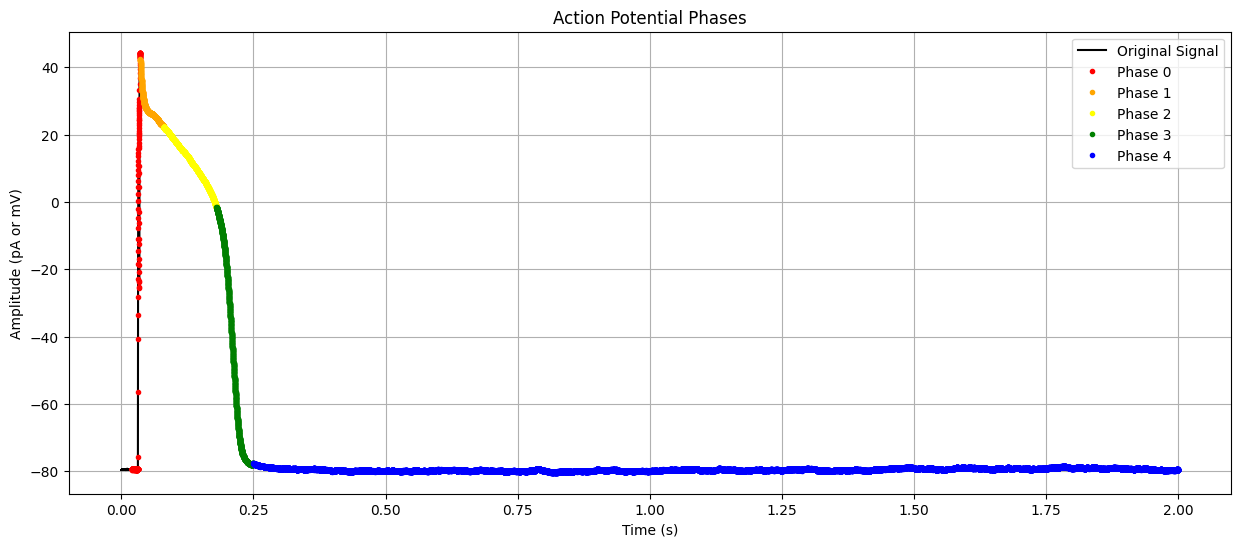

In [577]:
##### Analyze and get the sweep data
abf.setSweep(random_sweep_index)
sweepX = abf.sweepX
sweepY = abf.sweepY


# Define the phase times (start_time, end_time) for each phase
phase_times = [
    (0.02, 0.036),  # Phase 0
    (0.036, 0.08),  # Phase 1
    (0.08, 0.18),  # Phase 2
    (0.18, 0.25),  # Phase 3
    (0.25, 2.0)   # Phase 4
]

# Plot the phases
plot_phases(sweepX, sweepY, phase_times)

In [578]:
# Define the CSV file path to save the phase times
csv_file_path = "/Users/b/bio/cardiac/phases.csv"

#save to CSV
save_to_csv(sweepX, sweepY, phase_times, csv_file_path, random_sweep_index)



Phase times and x,y saved to /Users/b/bio/cardiac/phases.csv


In [579]:
# train the classifier

In [ ]:
# the classifier will read in a sweep and output the domain for each of the phases. 
# train a single classifier to output the phases

In [583]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


df = pd.read_csv('/Users/b/bio/cardiac/model1/phases.csv')


<bound method NDFrame.head of                                              File Path  Phase  Start Time (s)  \
0    /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      0           0.025   
1    /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      1           0.035   
2    /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      2           0.100   
3    /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      3           0.300   
4    /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      4           0.450   
..                                                 ...    ...             ...   
110  /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      0           0.020   
111  /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      1           0.036   
112  /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      2           0.080   
113  /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      3           0.180   
114  /Users/b/bio/cardiac/Pennsieve-dataset-297-ver...      4           0.250  

In [607]:
dataset = {}

# read file, sweep number, phase number
index = 0
file = df['File Path'][index]
sweepNum = df['Sweep Number'][index]
phaseNum = df['Phase'][index]
abf = pyabf.ABF(file)
abf.setSweep(sweepNum)

# Extract sweepX and sweepY
sweepX = abf.sweepX
sweepY = abf.sweepY

# Create a list of tuples (x, y)
totalSweep = list(zip(sweepX, sweepY))

phase0_x = df['X Values'][index]
phase0_y = df['Y Values'][index]
phase0 = list(zip(phase0_x, phase0_y))

phase1_x = df['X Values'][index+1]
phase1_y = df['Y Values'][index+1]
phase1 = list(zip(phase1_x, phase1_y))

phase2_x = df['X Values'][index+2]
phase2_y = df['Y Values'][index+2]
phase2 = list(zip(phase2_x, phase2_y))

phase3_x = df['X Values'][index+3]
phase3_y = df['Y Values'][index+3]
phase3 = list(zip(phase3_x, phase3_y))

phase4_x = df['X Values'][index+4]
phase4_y = df['Y Values'][index+4]
phase4 = list(zip(phase4_x, phase4_y))

dataset[str(totalSweep)] = [phase0, phase1, phase2, phase3, phase4]

index+=5

print(df['Phase'][index])
print(len(df))





0
115


In [633]:
output = []
input = []
index = 0
while index < len(df):
    file = df['File Path'][index]
    sweepNum = df['Sweep Number'][index]
    phaseNum = df['Phase'][index]
    abf = pyabf.ABF(file)
    abf.setSweep(sweepNum)
    
    # Extract sweepX and sweepY
    sweepX = abf.sweepX
    sweepY = abf.sweepY
    
    # Create a list of tuples (x, y)
    totalSweep = list(zip(sweepX, sweepY))

    input.append(totalSweep)

    
    phase0_x = ast.literal_eval(df['X Values'][index])
    phase0_y = ast.literal_eval(df['Y Values'][index])
    phase0 = list(zip(phase0_x, phase0_y))
    
    
    phase1_x = ast.literal_eval(df['X Values'][index+1])
    phase1_y = ast.literal_eval(df['Y Values'][index+1])
    phase1 = list(zip(phase1_x, phase1_y))
    
    phase2_x = ast.literal_eval(df['X Values'][index+2])
    phase2_y = ast.literal_eval(df['Y Values'][index+2])
    phase2 = list(zip(phase2_x, phase2_y))
    
    phase3_x = ast.literal_eval(df['X Values'][index+3])
    phase3_y = ast.literal_eval(df['Y Values'][index+3])
    phase3 = list(zip(phase3_x, phase3_y))
    
    phase4_x = ast.literal_eval(df['X Values'][index+4])
    phase4_y = ast.literal_eval(df['Y Values'][index+4])
    phase4 = list(zip(phase4_x, phase4_y))

    output.append([phase0[-1], phase1[-1], phase2[-1], phase3[-1], phase4[-1]])

    index += 5

    

In [638]:

import sys
import subprocess

# Install the wfdb package using pip
subprocess.check_call([sys.executable, "-m", "pip", "install", "tensorflow"])

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached tensorboard-2.17.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.4.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.2 MB/s eta 0:00:00
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.2/236.2 MB 12.1 MB/s eta 0:00:0000:


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


0

In [643]:
# building a seq2seq model

In [701]:
train_data = []
for i in range(len(input)):
    dic = {"1":input[i],
           "2":output[i]}
    train_data.append(dic)

In [702]:
train_data[0]["2"]

[(0.035, 54.01611328125),
 (0.1, 37.200927734375),
 (0.3, 9.613037109375),
 (0.45, -79.071044921875),
 (1.9999, -82.51953125)]

In [703]:
import re

def tokenize_data_points(data_points):
    """
    Tokenizes a list of data points in a 2D graph.
    
    Args:
        data_points (list of tuples): A list where each element is a tuple (x, y) representing a data point.
        
    Returns:
        list of str: A list of tokenized strings.
    """
    tokens = []
    for point in data_points:
        x, y = point
        tokens.append(f"({x},{y})")
    return tokens

# Example usage
data_points = [(1, 2), (3, 4), (5, 6)]
tokens = tokenize_data_points(data_points)
print(tokens)
for i in range(len(train_data)):
    train_data[i]["1_tokens"] = ["<sos>"] + tokenize_data_points(train_data[i]["1"]) + ["<eos>"]
    train_data[i]["2_tokens"] = ["<sos>"] + tokenize_data_points(train_data[i]["2"]) + ["<eos>"]

['(1,2)', '(3,4)', '(5,6)']


In [673]:
!python3.11 -m pip install --upgrade pip


  Using cached pip-24.1.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.1.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.13 requires torch<2.2,>=1.10, but you have torch 2.4.0 which is incompatible.


In [675]:
import subprocess
import sys

def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

def install_packages():
    packages = [
        "torch==2.0.1",
        "torchtext==0.15.2",  # Ensure this version is compatible with torch 2.0.1
        "spacy",
        "datasets",
        "tqdm",
        "evaluate",
        "numpy"  # Adding numpy for completeness
    ]
    for package in packages:
        install_package(package)

if __name__ == "__main__":
    install_packages()

    # Importing the packages to verify installation
    import torch
    import torch.nn as nn
    import torch.optim as optim
    import random
    import numpy as np
    import spacy
    import datasets
    import torchtext
    import tqdm
    import evaluate

    print("All packages installed successfully.")


  Using cached torch-2.0.1-cp311-none-macosx_11_0_arm64.whl.metadata (23 kB)
Using cached torch-2.0.1-cp311-none-macosx_11_0_arm64.whl (55.8 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.4.0
    Uninstalling torch-2.4.0:
      Successfully uninstalled torch-2.4.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.18.0 requires torch>=2.3.0, but you have torch 2.0.1 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.18.0
    Uninstalling torchtext-0.18.0:
      Successfully uninstalled torchtext-0.18.0
All packages installed successfully.


In [724]:
in_tokens = []
out_tokens = []
for data in train_data:
    in_tokens.extend(data["1_tokens"])
    out_tokens.extend(data["2_tokens"])



In [725]:
# Remove duplicates in tokens
unique_in_tokens = remove_duplicates(in_tokens)
unique_out_tokens = remove_duplicates(out_tokens)

In [728]:
# Create vocabulary
one_vocab = build_vocab_from_iterator([unique_in_tokens], min_freq=min_freq, specials=special_tokens)

# Check the vocab tokens
print(len(one_vocab.get_itos()))

523242


In [727]:
# Create vocabulary
two_vocab = build_vocab_from_iterator([unique_out_tokens], min_freq=min_freq, specials=special_tokens)

# Check the vocab tokens
print(two_vocab.get_itos())

['<sos>', '<eos>', '<pad>', '<unk>', '(0.01795,77.056884765625)', '(0.01795,92.987060546875)', '(0.02,41.32080078125)', '(0.02,48.309326171875)', '(0.02,50.29296875)', '(0.034,45.135498046875)', '(0.034,50.59814453125)', '(0.034,56.396484375)', '(0.0345,55.2978515625)', '(0.035,33.233642578125)', '(0.035,41.900634765625)', '(0.035,47.454833984375)', '(0.035,51.544189453125)', '(0.035,53.64990234375)', '(0.035,54.01611328125)', '(0.035,54.6875)', '(0.0359,52.79541015625)', '(0.0359,52.947998046875)', '(0.03595,42.66357421875)', '(0.03595,46.417236328125)', '(0.038,46.2646484375)', '(0.04,16.66259765625)', '(0.041,25.08544921875)', '(0.0449,38.543701171875)', '(0.044950000000000004,13.18359375)', '(0.05,31.219482421875)', '(0.055,12.5732421875)', '(0.0599,16.021728515625)', '(0.0599,38.87939453125)', '(0.05995,-52.154541015625)', '(0.05995,32.012939453125)', '(0.07,25.634765625)', '(0.08,22.27783203125)', '(0.08,22.3388671875)', '(0.08,25.81787109375)', '(0.08,28.6865234375)', '(0.08,29.

In [729]:
unk1_index = one_vocab[unk_token]
pad1_index = one_vocab[pad_token]

unk2_index = two_vocab[unk_token]
pad2_index = two_vocab[pad_token]

In [731]:
assert one_vocab[unk_token] == two_vocab[unk_token]
assert one_vocab[pad_token] == two_vocab[pad_token]

unk_index = one_vocab[unk_token]
pad_index = one_vocab[pad_token]

In [732]:
one_vocab.set_default_index(unk_index)
two_vocab.set_default_index(unk_index)

In [716]:
one_vocab["the"]

3

In [734]:
two_vocab.get_itos()[3]

'<unk>'

In [706]:
print(one_vocab.get_itos())

['<sos>', '<eos>', '<pad>', '<unk>', '(0.035,54.01611328125)', '(0.1,37.200927734375)', '(0.3,9.613037109375)', '(0.45,-79.071044921875)', '(1.9999,-82.51953125)']


In [735]:
def numericalize_example(example, one_vocab, two_vocab):
    one_ids = one_vocab.lookup_indices(example["1_tokens"])
    two_ids = two_vocab.lookup_indices(example["2_tokens"])
    return {"one_ids": one_ids, "two_ids": two_ids}

In [736]:
fn_kwargs = {"one_vocab": one_vocab, "two_vocab": two_vocab}

train_data = train_data.map(numericalize_example, fn_kwargs=fn_kwargs)
#valid_data = valid_data.map(numericalize_example, fn_kwargs=fn_kwargs)
#test_data = test_data.map(numericalize_example, fn_kwargs=fn_kwargs)

AttributeError: 'list' object has no attribute 'map'

In [754]:
# Example function to numericalize example and convert to tensors
def numericalize_example(example, one_vocab, two_vocab):
    example['1_ids'] = torch.tensor([one_vocab[token] for token in example['1_tokens']], dtype=torch.long)
    example['2_ids'] = torch.tensor([two_vocab[token] for token in example['2_tokens']], dtype=torch.long)
    return example

# Apply numericalize_example to each element in train_data
fn_kwargs = {"one_vocab": one_vocab, "two_vocab": two_vocab}
train_data = [numericalize_example(data, **fn_kwargs) for data in train_data]

# Print the processed train_data
print(train_data[0]['1_ids'])


tensor([     0,     22,     42,  ..., 523199, 523221,      1])


In [755]:
type(train_data[0]['1_ids'])

torch.Tensor

In [756]:
def get_collate_fn(pad_index):
    def collate_fn(batch):
        batch_en_ids = [example["1_ids"] for example in batch]
        batch_de_ids = [example["2_ids"] for example in batch]
        batch_en_ids = nn.utils.rnn.pad_sequence(batch_en_ids, padding_value=pad_index)
        batch_de_ids = nn.utils.rnn.pad_sequence(batch_de_ids, padding_value=pad_index)
        batch = {
            "1_ids": batch_en_ids,
            "2_ids": batch_de_ids,
        }
        return batch

    return collate_fn

In [757]:
def get_data_loader(dataset, batch_size, pad_index, shuffle=False):
    collate_fn = get_collate_fn(pad_index)
    data_loader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        collate_fn=collate_fn,
        shuffle=shuffle,
    )
    return data_loader

In [759]:
batch_size = 4

train_data_loader = get_data_loader(train_data, batch_size, pad_index, shuffle=True)
#valid_data_loader = get_data_loader(valid_data, batch_size, pad_index)
#test_data_loader = get_data_loader(test_data, batch_size, pad_index)

In [760]:
# build the encoder
class Encoder(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, n_layers, dropout):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=dropout)
        self.dropout = nn.Dropout(dropout)

    def forward(self, src):
        # src = [src length, batch size]
        embedded = self.dropout(self.embedding(src))
        # embedded = [src length, batch size, embedding dim]
        outputs, (hidden, cell) = self.rnn(embedded)
        # outputs = [src length, batch size, hidden dim * n directions]
        # hidden = [n layers * n directions, batch size, hidden dim]
        # cell = [n layers * n directions, batch size, hidden dim]
        # outputs are always from the top hidden layer
        return hidden, cell

In [761]:
# build the decoder
class Decoder(nn.Module):
    def __init__(self, output_dim, embedding_dim, hidden_dim, n_layers, dropout):
        super().__init__()
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.embedding = nn.Embedding(output_dim, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=dropout)
        self.fc_out = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input, hidden, cell):
        # input = [batch size]
        # hidden = [n layers * n directions, batch size, hidden dim]
        # cell = [n layers * n directions, batch size, hidden dim]
        # n directions in the decoder will both always be 1, therefore:
        # hidden = [n layers, batch size, hidden dim]
        # context = [n layers, batch size, hidden dim]
        input = input.unsqueeze(0)
        # input = [1, batch size]
        embedded = self.dropout(self.embedding(input))
        # embedded = [1, batch size, embedding dim]
        output, (hidden, cell) = self.rnn(embedded, (hidden, cell))
        # output = [seq length, batch size, hidden dim * n directions]
        # hidden = [n layers * n directions, batch size, hidden dim]
        # cell = [n layers * n directions, batch size, hidden dim]
        # seq length and n directions will always be 1 in this decoder, therefore:
        # output = [1, batch size, hidden dim]
        # hidden = [n layers, batch size, hidden dim]
        # cell = [n layers, batch size, hidden dim]
        prediction = self.fc_out(output.squeeze(0))
        # prediction = [batch size, output dim]
        return prediction, hidden, cell

In [762]:
# build seq2seq
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        assert (
            encoder.hidden_dim == decoder.hidden_dim
        ), "Hidden dimensions of encoder and decoder must be equal!"
        assert (
            encoder.n_layers == decoder.n_layers
        ), "Encoder and decoder must have equal number of layers!"

    def forward(self, src, trg, teacher_forcing_ratio):
        # src = [src length, batch size]
        # trg = [trg length, batch size]
        # teacher_forcing_ratio is probability to use teacher forcing
        # e.g. if teacher_forcing_ratio is 0.75 we use ground-truth inputs 75% of the time
        batch_size = trg.shape[1]
        trg_length = trg.shape[0]
        trg_vocab_size = self.decoder.output_dim
        # tensor to store decoder outputs
        outputs = torch.zeros(trg_length, batch_size, trg_vocab_size).to(self.device)
        # last hidden state of the encoder is used as the initial hidden state of the decoder
        hidden, cell = self.encoder(src)
        # hidden = [n layers * n directions, batch size, hidden dim]
        # cell = [n layers * n directions, batch size, hidden dim]
        # first input to the decoder is the <sos> tokens
        input = trg[0, :]
        # input = [batch size]
        for t in range(1, trg_length):
            # insert input token embedding, previous hidden and previous cell states
            # receive output tensor (predictions) and new hidden and cell states
            output, hidden, cell = self.decoder(input, hidden, cell)
            # output = [batch size, output dim]
            # hidden = [n layers, batch size, hidden dim]
            # cell = [n layers, batch size, hidden dim]
            # place predictions in a tensor holding predictions for each token
            outputs[t] = output
            # decide if we are going to use teacher forcing or not
            teacher_force = random.random() < teacher_forcing_ratio
            # get the highest predicted token from our predictions
            top1 = output.argmax(1)
            # if teacher forcing, use actual next token as next input
            # if not, use predicted token
            input = trg[t] if teacher_force else top1
            # input = [batch size]
        return outputs

In [770]:
input_dim = len(one_vocab)
output_dim = len(two_vocab)
encoder_embedding_dim = 64
decoder_embedding_dim = 64
hidden_dim = 128
n_layers = 2
encoder_dropout = 0.5
decoder_dropout = 0.5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

encoder = Encoder(
    input_dim,
    encoder_embedding_dim,
    hidden_dim,
    n_layers,
    encoder_dropout,
)

decoder = Decoder(
    output_dim,
    decoder_embedding_dim,
    hidden_dim,
    n_layers,
    decoder_dropout,
)

model = Seq2Seq(encoder, decoder, device).to(device)

In [771]:
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param.data, -0.08, 0.08)


model.apply(init_weights)


Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(523242, 64)
    (rnn): LSTM(64, 128, num_layers=2, dropout=0.5)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(110, 64)
    (rnn): LSTM(64, 128, num_layers=2, dropout=0.5)
    (fc_out): Linear(in_features=128, out_features=110, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)

In [772]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f"The model has {count_parameters(model):,} trainable parameters")

The model has 33,971,566 trainable parameters


In [773]:
optimizer = optim.Adam(model.parameters())

In [774]:
criterion = nn.CrossEntropyLoss(ignore_index=pad_index)

In [775]:
def train_fn(
    model, data_loader, optimizer, criterion, clip, teacher_forcing_ratio, device
):
    model.train()
    epoch_loss = 0
    for i, batch in enumerate(data_loader):
        src = batch["2_ids"].to(device)
        trg = batch["1_ids"].to(device)
        # src = [src length, batch size]
        # trg = [trg length, batch size]
        optimizer.zero_grad()
        output = model(src, trg, teacher_forcing_ratio)
        # output = [trg length, batch size, trg vocab size]
        output_dim = output.shape[-1]
        output = output[1:].view(-1, output_dim)
        # output = [(trg length - 1) * batch size, trg vocab size]
        trg = trg[1:].view(-1)
        # trg = [(trg length - 1) * batch size]
        loss = criterion(output, trg)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(data_loader)

In [776]:
def evaluate_fn(model, data_loader, criterion, device):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for i, batch in enumerate(data_loader):
            src = batch["2_ids"].to(device)
            trg = batch["1_ids"].to(device)
            # src = [src length, batch size]
            # trg = [trg length, batch size]
            output = model(src, trg, 0)  # turn off teacher forcing
            # output = [trg length, batch size, trg vocab size]
            output_dim = output.shape[-1]
            output = output[1:].view(-1, output_dim)
            # output = [(trg length - 1) * batch size, trg vocab size]
            trg = trg[1:].view(-1)
            # trg = [(trg length - 1) * batch size]
            loss = criterion(output, trg)
            epoch_loss += loss.item()
    return epoch_loss / len(data_loader)

In [ ]:
n_epochs = 10
clip = 1.0
teacher_forcing_ratio = 0.5

best_valid_loss = float("inf")

for epoch in tqdm.tqdm(range(n_epochs)):
    train_loss = train_fn(
        model,
        train_data_loader,
        optimizer,
        criterion,
        clip,
        teacher_forcing_ratio,
        device,
    )
    valid_loss = evaluate_fn(
        model,
        valid_data_loader,
        criterion,
        device,
    )
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "tut1-model.pt")
    print(f"\tTrain Loss: {train_loss:7.3f} | Train PPL: {np.exp(train_loss):7.3f}")
    print(f"\tValid Loss: {valid_loss:7.3f} | Valid PPL: {np.exp(valid_loss):7.3f}")

In [777]:
n_epochs = 10
clip = 1.0
teacher_forcing_ratio = 0.5

best_valid_loss = float("inf")

for epoch in tqdm.tqdm(range(n_epochs)):
    train_loss = train_fn(
        model,
        train_data_loader,
        optimizer,
        criterion,
        clip,
        teacher_forcing_ratio,
        device,
    )

  0%|                                                    | 0/10 [00:00<?, ?it/s]


IndexError: index out of range in self

In [778]:
encoder_embedding_dim = 64
decoder_embedding_dim = 64
hidden_dim = 128
n_layers = 2
encoder_dropout = 0.5
decoder_dropout = 0.5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

encoder = Encoder(
    input_dim,
    encoder_embedding_dim,
    hidden_dim,
    n_layers,
    encoder_dropout,
)

decoder = Decoder(
    output_dim,
    decoder_embedding_dim,
    hidden_dim,
    n_layers,
    decoder_dropout,
)

model = Seq2Seq(encoder, decoder, device).to(device)

# Example train function
def train_fn(model, data_loader, optimizer, criterion, clip, teacher_forcing_ratio, device):
    model.train()
    epoch_loss = 0
    for batch in data_loader:
        src = batch['input_tokens'].to(device)
        trg = batch['output_tokens'].to(device)
        optimizer.zero_grad()
        output = model(src, trg, teacher_forcing_ratio)
        output_dim = output.shape[-1]
        output = output[1:].view(-1, output_dim)
        trg = trg[1:].view(-1)
        loss = criterion(output, trg)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(data_loader)

# Dummy DataLoader for example purposes
from torch.utils.data import DataLoader

train_data_loader = DataLoader(train_data, batch_size=2, shuffle=True)

# Example optimizer and criterion
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Example training loop
n_epochs = 10
clip = 1
teacher_forcing_ratio = 0.5

for epoch in range(n_epochs):
    train_loss = train_fn(
        model,
        train_data_loader,
        optimizer,
        criterion,
        clip,
        teacher_forcing_ratio,
        device,
    )
    print(f"Epoch {epoch + 1}, Train Loss: {train_loss:.4f}")


RuntimeError: Expected hidden[0] size (2, 7, 128), got [2, 20002, 128]